In [1]:
#Importing Libraries

import pandas as pd
import numpy as np

In [2]:
#Load Dataset

dataset = pd.read_csv('salary_prediction_estimation.csv')

In [3]:
#Summarize Dataset

print(dataset.shape)
print(dataset.head(5))

(428, 5)
   age  education.num  capital.gain  hours.per.week income
0   54              9             0              40  <=50k
1   39              9             0              22   >50k
2   38             10             0              29   >50k
3   29              4             0              19   >50k
4   19             10             0              29   >50k


In [4]:
# Mapping Salary Data to Binary Value

income_set = set(dataset['income'])
dataset['income'] = dataset['income'].map({'<=50k':0, '>50k': 1}).astype(int)
print(dataset.head(5))

   age  education.num  capital.gain  hours.per.week  income
0   54              9             0              40       0
1   39              9             0              22       1
2   38             10             0              29       1
3   29              4             0              19       1
4   19             10             0              29       1


In [5]:
# Segregate Dataset into X & Y

X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

In [6]:
# Splitting Dataset into Train & Test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state=0)

In [7]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Text(0, 0.5, 'Mean Error')

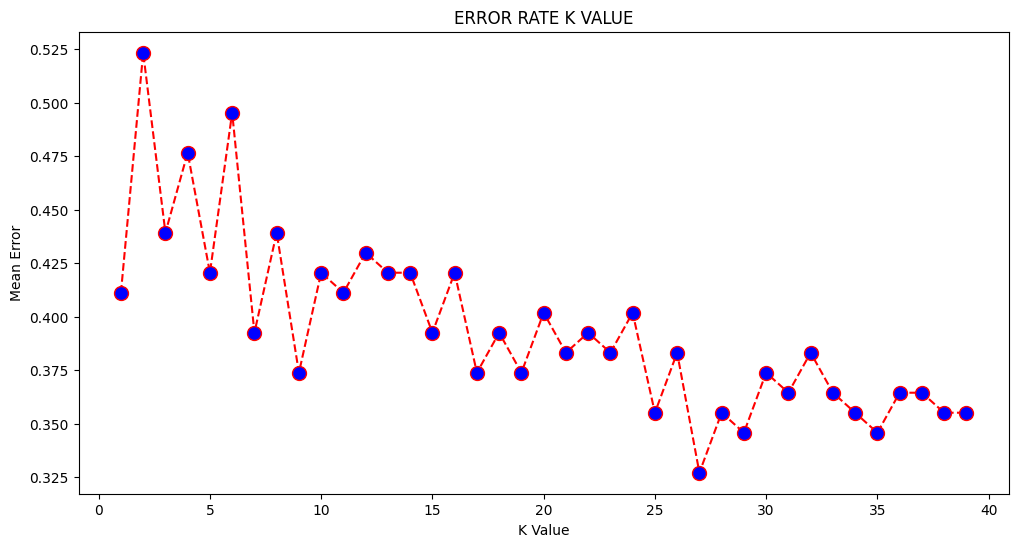

In [8]:
# Finding the Best K-Value

error = []
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt

for i in range(1, 40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    pred_i = model.predict(x_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1, 40),error,color='red', linestyle='dashed' ,marker='o',markerfacecolor='blue',markersize=10)
plt.title("ERROR RATE K VALUE")
plt.xlabel("K Value")
plt.ylabel("Mean Error")

In [9]:
# Training

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=27,metric='minkowski',p=2)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=27)

In [10]:
# Predicting the Salary

age = int(input("Enter the New Employee Age:"))
ed = int(input("Enter the New Employee Eduction:"))
cg = int(input("Enter the New Employee Captital Gain:"))
wh = int(input("Enter the New Employee Hour's Per Week:"))
newEmp = [[age,ed,cg,wh]]
result = model.predict(sc.transform(newEmp))
print(result)

if result == 1:
    print("Employee might got Salary above 50K")
else:
    print("Employee might not got Salary above 50K")
    


Enter the New Employee Age:54
Enter the New Employee Eduction:9
Enter the New Employee Captital Gain:0
Enter the New Employee Hour's Per Week:40
[1]
Employee might got Salary above 50K


In [11]:
# Prediction for all Test Data

y_pred = model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]]


In [12]:
#Evaluating Model - ACCURACY SCORE

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)

print("Confusion Matrix: ")
print(cm)

print(f"Accuracy :{accuracy_score(y_test,y_pred)*100}")


Confusion Matrix: 
[[ 3 31]
 [ 4 69]]
Accuracy :67.28971962616822
